In [1]:
#!pip install siemens.gtt_client --extra-index-url https://__token__:<api-key>@code.siemens.com/api/v4/projects/386503/packages/pypi/simple



In [2]:

#using plotly for analysis
import plotly as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as splt

def visualize():

    fig = splt.make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.02)
    fig.add_trace(go.Scatter(x=df[datetime_col], y=inputdf[targets[0]], name="Actual1",connectgaps=True), row=1, col=1)
    fig.add_trace(go.Scatter(x=newdf[datetime_col], y=newdf.forecast, name="Predictions" , connectgaps=True), row=1, col=1)
    fig.add_trace(go.Scatter(x=newdf[datetime_col], y=newdf[targets[0]], name="Actual",connectgaps=True), row=1, col=1)

    #fig.add_trace(go.Scatter(x=X_test.index, y=X_test["label"], name="label",connectgaps=True), row=2, col=1)

    fig.update_layout(height=600, width=1200, title_text="Data visualization")
    fig.show() 

c:\Users\uvoc6q\AppData\Local\miniconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


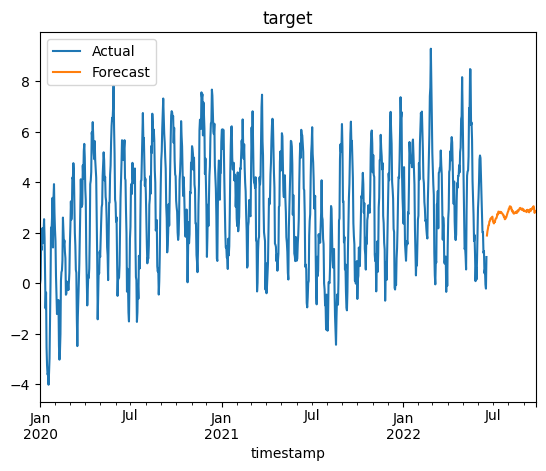

In [3]:
##Must include the following two lines if using Jupyter notebook.
import nest_asyncio
nest_asyncio.apply()

import pandas as pd
from siemens.gtt_client.client import GTTClient

#df = pd.read_csv("ConcreteCompressiveStrength.csv")
#df = pd.read_csv("Electric_Production.csv")
# df = pd.read_csv('../data/Synthetic data/synthetic_electricity_consumption.csv')
# targets = ['Electricity Consumption']
# datetime_col = 'DateTime'

df = pd.read_csv('../data/Synthetic data/synthetic_Forecast.csv')  #
targets =    ["target"]
datetime_col = "timestamp"

df = df[:7936]
h = 100 #forecast horizon
l = df.shape[0] - h #context length

# targets = ['Concrete compressive strength']
# datetime_col = 'Timestamp'

# targets = ['IPG2211A2N']
# datetime_col = 'DATE'





inputdf = df.loc[:l-1, [datetime_col, *targets]]

#covariates = ["Cement", "Blast Furnace Slag", "Fly Ash", "Superplasticizer", 'Coarse Aggregate', 'Fine Aggregate', 'Age']
#covariates = ["Temperature", "Wind Speed", "Humidity"]
covariates = []

# using covariates for the all the dataset
covariate_df = df.loc[:, [datetime_col, *covariates]] ##covariates are assumed to be available in the prediction horizon
#covariate_df = df.loc[:l+h-1, [datetime_col, *covariates]] ##covariates are assumed to be available in the prediction horizon



# inputdf = df.loc[:l-1, targets]

gtt = GTTClient(base_url="CN", allow_datacollection=True)
forecastdf = gtt.forecast(inputdf, target_cols=targets, forecast_horizon=h, datetime_col=datetime_col, 
                          covariate_df=covariate_df, covariate_cols=covariates, long_term=True , pi_level=95) #, detrend=True)
# forecastdf = gtt.forecast(inputdf, target_cols=targets, forecast_horizon=h)
gtt.plot_forecast(inputdf, forecastdf, target=targets[0], datetime_col=datetime_col) #, pi_level=95)

newdf = df.tail(h) # used for visualization
newdf['forecast'] = forecastdf[targets[0]].values # used for visualization
visualize()
## sample 3 traces in the forecast horizon
# for i in range(3):
#     print(f'Trace {i}:')
#     forecastdf = gtt.forecast_and_sample(inputdf, target_cols=targets, forecast_horizon=h, datetime_col=datetime_col, 
#                               covariate_df=covariate_df, covariate_cols=covariates)
#     gtt.plot_sample(inputdf, forecastdf, target=targets[0], datetime_col=datetime_col)
#     newdf['forecast'] = forecastdf[targets[0]].values
#     visualize()


In [4]:
# newdf = df.tail(h)
# #print (df.head())

# #newdf = df.loc[:h-1, ['Timestamp', 'Concrete compressive strength']]
# newdf['forecast'] = forecastdf['Concrete compressive strength'].values

# print (newdf.shape)

In [5]:
# #print (df.shape)
# print (newdf.tail(10))
# #print (df.tail(10))

In [6]:
#gtt.plot_forecast(df, forecastdf, target='Concrete compressive strength')


In [7]:
#Try the same steps with the tutorial dataset
df = pd.read_csv("./tutorials/ETTh.csv")
l = 7859 #df.shape[0]
h = 100


# print (df.shape)

# targets = ['LUFL', 'MUFL']
# inputdf = df.loc[:l-1, targets]

# gtt = GTTClient(base_url='CN')
# forecastdf = gtt.forecast(inputdf, target_cols=targets, forecast_horizon=h)
# gtt.plot_forecast(inputdf, forecastdf, target='MUFL')
# gtt.plot_forecast(inputdf, forecastdf, target='LUFL')

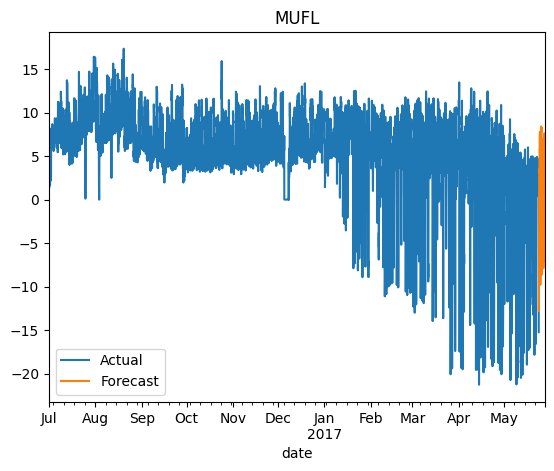

In [8]:
#with covariates and datetime column
targets = ['MUFL']
datetime_col = 'date'
inputdf = df.loc[:l-1, [datetime_col, *targets]]

#covariates = ["MUFL", "MULL", "LUFL", "LULL", 'HUFL', 'HULL']
covariates = []
covariate_df = df.loc[:l+h-1, [datetime_col, *covariates]] ##covariates are assumed to be available in the prediction horizon


forecastdf = gtt.forecast(inputdf, target_cols=targets, forecast_horizon=h, datetime_col=datetime_col, 
                          covariate_df=covariate_df, covariate_cols=covariates, long_term=True)
gtt.plot_forecast(inputdf, forecastdf, target='MUFL', datetime_col=datetime_col)

In [9]:
newdf = df.tail(100)
#print (df.head())

#newdf = df.loc[:h-1, ['Timestamp', 'Concrete compressive strength']]
newdf['forecast'] = forecastdf['MUFL'].values

print (newdf.shape)

(100, 9)


In [10]:
#using plotly for analysis
import plotly as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as splt

fig = splt.make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.02)
fig.add_trace(go.Scatter(x=df.date, y=inputdf['MUFL'], name="Actual1",connectgaps=True), row=1, col=1)
fig.add_trace(go.Scatter(x=newdf.date, y=newdf.forecast, name="Predictions" , connectgaps=True), row=1, col=1)
fig.add_trace(go.Scatter(x=newdf.date, y=newdf['MUFL'], name="Actual",connectgaps=True), row=1, col=1)



#fig.add_trace(go.Scatter(x=X_test.index, y=X_test["label"], name="label",connectgaps=True), row=2, col=1)

fig.update_layout(height=600, width=1200, title_text="Data visualization")
fig.show() 